In [2]:
import os
import numpy as np
import pandas as pd
import sys
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


## Principal component analysis using all features from the AAindex database

In [3]:
def read_aaindex_database(path_to_aa_database):
    amino_acids = ['A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V']
    database = dict()
    with open(path_to_aa_database,"r") as f:
        flag = False
        
        for line in f:
            line = line.split()
            if line[0] == "H":
                accession = line[1]
                if accession not in database.keys():
                    database[accession] = []
                else:
                    print(accession)
                    sys.exit(1)
            if line[0] == "I":
                flag = True
            elif line[0] == "//":
                database[accession] = {aa:score for aa,score in zip(amino_acids,database[accession])}
                flag = False

            elif flag is True:
                database[accession] += [x for x in line]
    return database        

path_to_aaindex = "/Users/christianpederjacobsen/Dropbox/Mac/Desktop/leg/peptide_immunogenicity/data/aaindex1"
aa_index_database = read_aaindex_database(path_to_aaindex)
aa_index_df = pd.DataFrame.from_dict(aa_index_database).T

In [5]:
aa_index_df = aa_index_df.replace("NA",np.nan)
print(aa_index_df.shape)
aa_index_df = aa_index_df.dropna(axis=0).astype("float")
print(aa_index_df.shape)

(566, 20)
(553, 20)


In [6]:
aa_index_df

,A,R,N,D,C,Q,E,G,H,I,L,K,M,F,P,S,T,W,Y,V
ANDN920101,4.35,4.380,4.750,4.760,4.650,4.370,4.290,3.97,4.630,3.950,4.170,4.360,4.520,4.660,4.44,4.500,4.350,4.700,4.600,3.95
ARGP820101,0.61,0.600,0.060,0.460,1.070,0.000,0.470,0.07,0.610,2.220,1.530,1.150,1.180,2.020,1.95,0.050,0.050,2.650,1.880,1.32
ARGP820102,1.18,0.200,0.230,0.050,1.890,0.720,0.110,0.49,0.310,1.450,3.230,0.060,2.670,1.960,0.76,0.970,0.840,0.770,0.390,1.08
ARGP820103,1.56,0.450,0.270,0.140,1.230,0.510,0.230,0.62,0.290,1.670,2.930,0.150,2.960,2.030,0.76,0.810,0.910,1.080,0.680,1.14
BEGF750101,1.00,0.520,0.350,0.440,0.060,0.440,0.730,0.35,0.600,0.730,1.000,0.600,1.000,0.600,0.06,0.350,0.440,0.730,0.440,0.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KARS160118,6.00,5.000,6.600,6.800,9.330,6.500,6.670,3.50,4.700,6.000,6.000,6.170,8.000,6.000,6.00,7.330,5.400,5.667,6.220,6.00
KARS160119,12.00,23.343,27.708,28.634,28.000,27.831,28.731,7.00,24.243,24.841,25.021,22.739,31.344,26.993,24.00,20.000,23.819,29.778,28.252,24.00
KARS160120,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.00,-1.734,-1.641,0.000,-0.179,0.000,0.000,0.00,0.000,-4.227,0.211,-0.960,0.00
KARS160121,6.00,10.667,10.000,10.400,11.333,10.500,10.667,3.50,10.400,9.600,9.600,10.167,13.600,12.000,12.00,8.667,9.000,12.750,12.222,9.00


In [7]:
# Separating out the features
x = aa_index_df.loc[:,:].T.values
# Standardizing the features
x = StandardScaler().fit_transform(x)

## How much variance is explained by the principal components?

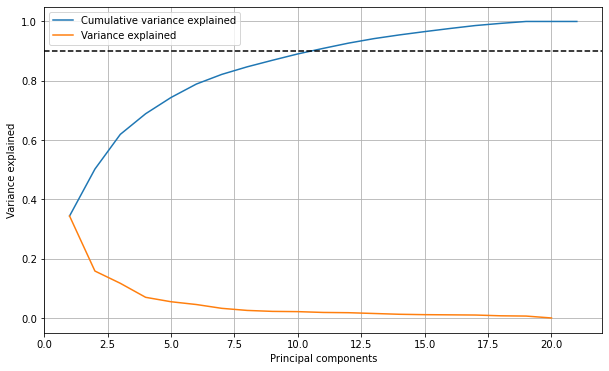

In [9]:
pca = PCA(n_components=20)
pca.fit_transform(x)
variance_explained = pca.explained_variance_ratio_
cumsum = [np.sum(variance_explained[:i+1]) for i in range(len(variance_explained) + 1)]

plt.figure(figsize=(10,6))
plt.plot(np.arange(len(cumsum)) + 1,cumsum,label="Cumulative variance explained")
plt.plot(np.arange(len(variance_explained)) + 1,variance_explained,label="Variance explained")
plt.axhline(0.9,linestyle="--",color="k")
plt.xlabel("Principal components")
plt.ylabel("Variance explained")
plt.grid(True)
plt.legend()
plt.show()



In [10]:
positive = "blue"
negative = "red"
polar = "yellow"
hydrophobic = "magenta"
special = "green"

aa_colors = {"D":negative,"E":negative,
        "R":positive,"K":positive,"H":positive,
        "A":hydrophobic,"I":hydrophobic,"L":hydrophobic,"M":hydrophobic,"F":hydrophobic,"W":hydrophobic,"Y":hydrophobic,"W":hydrophobic,"V":hydrophobic,
        "S":polar,"T":polar,"N":polar,"Q":polar,
        "C":special,"G":special,"P":special}

## How does the aminoacids plot using the two first principal components?

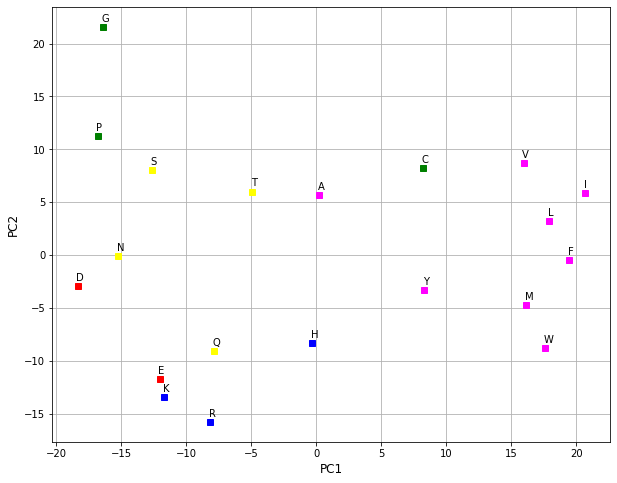

In [11]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
principalDf["AAs"] = list(aa_index_df.columns)

fig = plt.figure(figsize=(10,8))
for i,aa in principalDf.iterrows():
    plt.plot(aa["PC1"],aa["PC2"],label=aa["AAs"],marker="s",ls="",color=aa_colors[aa["AAs"]])
    plt.text(aa["PC1"]-0.1,aa["PC2"] + 0.5,aa["AAs"])
plt.grid(True)
plt.xlabel("PC1",size=12)
plt.ylabel("PC2",size=12)
plt.show()

In [13]:
aaindex_PCA = (principalDf - principalDf.mean()) / principalDf.std()
aaindex_PCA

,PC1,PC2
AAs,,
A,0.017008,0.589645
R,-0.577763,-1.644108
N,-1.076009,-0.004998
D,-1.297090,-0.305675
C,0.581131,0.853766
Q,-0.556030,-0.945575
E,-0.852175,-1.215784
G,-1.159379,2.249689
H,-0.023273,-0.869774


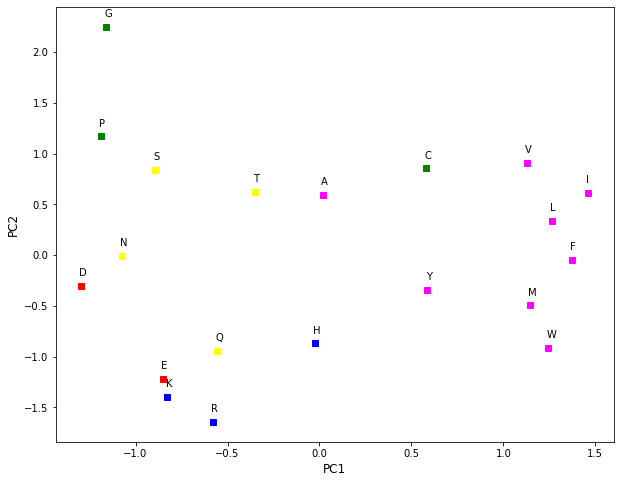

In [16]:
fig = plt.figure(figsize=(10,8))
for index,aa in aaindex_PCA.iterrows():
    plt.plot(aa["PC1"],aa["PC2"],label=index,marker="s",ls="",color=aa_colors[index])
    plt.text(aa["PC1"]-0.01,aa["PC2"] + 0.1,index)
plt.xlabel("PC1",size=12)
plt.ylabel("PC2",size=12)
plt.show()

## Saving the 12 first principal components to transform peptides

In [9]:
n_PCs = 12
# Separating out the features
x = aa_index_df.loc[:,:].T
# Standardizing the features
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=n_PCs)
principal_components = pca.fit_transform(x)
principal_components.shape
principalDf = pd.DataFrame(data = principal_components, columns = [f"PC{i+1}" for i in range(n_PCs)])
principalDf.index = aa_index_df.T.index
principalDf

for col in principalDf.columns:
  principalDf[col] = (principalDf[col] - principalDf[col].mean())/principalDf[col].std() 

principalDf

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
A,0.017008,0.589648,2.011631,0.205684,0.594967,0.380925,-0.840593,-0.172088,0.985469,-0.646491,0.250483,0.527057
R,-0.577763,-1.644109,-0.134837,0.066660,-1.554776,-1.611648,-0.741095,-1.434611,-0.617675,-1.657666,1.663081,-0.686562
N,-1.076009,-0.004994,-0.499888,-0.898601,-0.344208,0.615030,0.603538,1.434012,-0.035180,1.357678,0.628175,-0.665442
D,-1.297089,-0.305679,-0.004647,-0.316117,1.046972,1.065544,2.075274,-0.364091,-0.569627,-0.388747,0.386519,-0.458053
C,0.581131,0.853767,-0.864950,-2.348777,1.862142,-1.653278,-0.416616,-1.299264,-0.363512,1.180362,0.746679,0.183137
Q,-0.556030,-0.945575,0.221494,-0.055209,0.260457,-0.484589,-0.260759,0.115961,0.128653,0.102216,-1.797892,-1.135749
E,-0.852176,-1.215783,1.366815,0.440155,1.472666,0.684042,1.104685,-0.858401,-0.740714,-0.312402,-0.024126,0.753759
G,-1.159379,2.249688,0.170368,-0.828657,-1.437209,1.795292,-1.335324,-1.104523,-1.023905,-0.533170,-0.423801,0.124574
H,-0.023273,-0.869776,-0.594215,-0.720319,0.166043,0.139646,-0.981963,2.422543,-0.865189,-0.849827,0.545784,2.546861
I,1.461097,0.611112,0.336338,0.599772,-0.488958,-0.391057,0.922641,0.002508,-1.086840,0.354838,-1.066482,0.442511


In [10]:
# principalDf.to_csv("../data/PCA_repr_aa_std.csv")
principalDf.to_csv("/Users/christianpederjacobsen/Dropbox/Mac/Desktop/leg/peptide_immunogenicity/data/PCA_repr_aa_standardized.csv")